<h1><b><center>Liam Maher & Aiden Townsend
Comp 3270 Programming Assignment</center></b></h1>

<h2><b>Introduction</b></h2>

This notebook presents an empirical analysis of algorithms focusing on both Matrix Multiplication and Matrix-Chain Multiplication. The goal is to implement the provided algorithms, generate data frames, visualize growth rates, and compare empirical results with theoretical predictions.

<h3>Step 1: Import Necessary Libraries</h3>

The following code imports the libraries needed for the experiment.  As mentioned in the project instructions, pandas, numpy, and time are used, as well as matplotlib.pyplot for visualization purposes.

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

<h3>Step 2: Implement Algorithms</h3>

<h4>Algorithm-1</h4>

The following code is my implementation of Algorithm-1 provided in the project details. The inputs are A and B, two matrices that are of size pxq and qxr respectively, as well as a matrix C that is of dimensions pxr that contains the result of the iterative matrix multiplication of A and B.

In [2]:
def algorithm_1(A, B, C, p, q, r):
        for i in range(p):  
            for j in range(r):
                sum_val = 0
                for k in range(q):
                    sum_val += A[i][k] * B[k][j]
                C[i][j] = sum_val
        return C

<h4>Algorithm-2</h4>

The following code is my implementation of Algorithm-2 provided in the project details. The inputs are A and B, two matrices that are of size pxq and qxr respectively, as well as a matrix C that is of dimensions pxr that contains the result of the iterative matrix multiplication of A and B. T is the tile size and acts to increment I, J, K, etc. withing the loop

In [3]:
def algorithm_2(A, B, C, p, q, r, T=5):
    for I in range(0, p, T):
        for J in range(0, r, T):
            for K in range(0, q, T):
                for i in range(I, min(I + T, p)):
                    for j in range(J, min(J + T, r)):
                        sum_val = 0
                        for k in range(K, min(K + T, q)):
                            sum_val += A[i][k] * B[k][j]
                        C[i][j] += sum_val
    return C

<h4>Algorithm-3</h4>

The following code is my implementation of Algorithm-3 provided in the project details.  The inputs are A and B, two matrices that are of size pxq and qxr respectively, as well as a matrix C that is of dimensions pxr that contains the result of the recursive matrix multiplication of A and B.

NOTE: Github's coding assistance AI CoPilot was used in order to generate the "Split matrices" as well as the "Combine results into C" code commented in the code below, it was then adapted to work for the entire algorithm.

In [4]:
def algorithm_3(A, B, C, p, q, r):
    if max(p, q, r) < 8:
        return algorithm_1(A, B, C, p, q, r)
    else:
        if max(p, q, r) == p:
            split_axis = 0  # Split A horizontally
        elif max(p, q, r) == r:
            split_axis = 1  # Split B vertically
        else:
            split_axis = 0  # Split A vertically and B horizontally
        
        # Split matrices #GitHub Copilot
        half_index = p // 2 if split_axis == 0 else r // 2
        A1, A2 = np.split(A, [half_index], axis=split_axis)
        B1, B2 = np.split(B, [half_index], axis=1 - split_axis)
        
        # Recursive matrix multiplication
        C1 = algorithm_3(A1, B1, None, *A1.shape, *B1.shape)
        C2 = algorithm_3(A1, B2, None, *A1.shape, *B2.shape)
        C3 = algorithm_3(A2, B1, None, *A2.shape, *B1.shape)
        C4 = algorithm_3(A2, B2, None, *A2.shape, *B2.shape)
        
        # Combine results into C #GitHub Copilot
        C[:C1.shape[0], :C1.shape[1]] = C1
        C[:C2.shape[0], C1.shape[1]:] = C2
        C[C1.shape[0]:, :C3.shape[1]] = C3
        C[C1.shape[0]:, C3.shape[1]:] = C4
        
        return C

<h4>Algorithm-4</h4>

The following code is my implementation of Algorithm-4 provided in the project details.  The inputs are The inputs A and B are 2^n x 2^n matrices that are partitioned into 4 equal blocks of size 2^(n/2) and 2^(n/2) and the intermediate matrices are computed and then combined into matrix C which is a 2^n x 2^n matrix that holds the output matrix for the multiplication of A and B.

In [5]:
def algorithm_4(A, B, C):
    n = len(A)
    if n == 1:
        C[0][0] = A[0][0] * B[0][0]
    else:
        mid = n // 2

        # Partition A and B into 4 equal-sized blocks
        A11 = A[:mid, :mid]
        A12 = A[:mid, mid:]
        A21 = A[mid:, :mid]
        A22 = A[mid:, mid:]

        B11 = B[:mid, :mid]
        B12 = B[:mid, mid:]
        B21 = B[mid:, :mid]
        B22 = B[mid:, mid:]

        # Compute intermediate matrices using block partitioning
        P1 = algorithm_4(A11, B11, np.zeros((mid, mid))) + algorithm_4(A12, B21, np.zeros((mid, mid)))
        P2 = algorithm_4(A11, B12, np.zeros((mid, mid))) + algorithm_4(A12, B22, np.zeros((mid, mid)))
        P3 = algorithm_4(A21, B11, np.zeros((mid, mid))) + algorithm_4(A22, B21, np.zeros((mid, mid)))
        P4 = algorithm_4(A21, B12, np.zeros((mid, mid))) + algorithm_4(A22, B22, np.zeros((mid, mid)))

        # Combine intermediate results into the result matrix C
        C[:mid, :mid] = P1
        C[:mid, mid:] = P2
        C[mid:, :mid] = P3
        C[mid:, mid:] = P4

    return C

<h4>Algorithm-5</h4>

The following code is my implementation of Algorithm-5 provided in the project details.  This algorithm utilizes Strassens Algorithm for Matrix Multiplication.  The inputs are The inputs A and B are 2^n x 2^n matrices that are partitioned into 4 equal blocks of size 2^(n/2) and 2^(n/2) and then calculated into matrix C, a 2^n x 2^n matrix.  If n (in 2^n) is less than 3, then the algorithm decides to take an iterative approach by calling Algorithm-1 from before.

In [6]:
def algorithm_5(A, B, C):
        n = int(np.log2(len(A)))
        if n < 3:
            algorithm_1(A, B, C, 2 ** n, 2 ** n, 2 ** n)
        else:
            A11 = A[:n, :n]
            A12 = A[:n, n:]
            A21 = A[n:,:n]
            A22 = A[n:, n:]

            B11 = B[:n, :n]
            B12 = B[:n, n:]
            B21 = B[n:, :n]
            B22 = B[n:, n:]

            M1 = algorithm_5(A11 + A22, B11 + B22, np.zeros(n, n))
            M2 = algorithm_5(A21+A22, B11, np.zeros(n, n))
            M3 = algorithm_5(A11, B12 - B22, np.zeros(n, n))
            M4 = algorithm_5(A22, B21 - B11, np.zeros(n, n))
            M5 = algorithm_5(A11 + A12, B22, np.zeros(n, n))
            M6 = algorithm_5(A21 - A11, B11 + B12, np.zeros(n, n))
            M7 = algorithm_5(A12 - A22, B21 + B22, np.zeros(n, n))

            C11 = M1 + M4 - M5 + M7
            C12 = M3 + M5
            C21 = M2 + M4
            C22 = M1 - M2 + M3 + M6

            C[:n, :n] = C11
            C[:n, n:] = C12
            C[n:, :n] = C21
            C[n:, n:] = C22
        return C

<h3>Step 3: Matrix Multiplication Problem</h3>

The following code completes parts (a) of the Matrix Multiplication problem detailed in the project description.  It reads an input file that has a list of 16 numbers seperated by commas and then another 16 numbers after a semicolon. It then creates 2 4x4 matrices with the list of numbers and multiplies them together with each of the algorithms 1-5 detailed above.  After this, it prints the result of the matrix Multiplication.

In [7]:

filename = 'input.txt'
with open(filename, 'r') as file:
    line = file.readline().strip()
    seq1, seq2 = map(str.strip, line.split(';'))

# Convert sequences to arrays and reshape to 4x4 matrices
matrix_a = np.array(seq1.split(','), dtype=int).reshape(4, 4)
matrix_b = np.array(seq2.split(','), dtype=int).reshape(4, 4)

result_algorithm_1 = np.zeros((4, 4))
result_algorithm_2 = np.zeros((4, 4))
result_algorithm_3 = np.zeros((4, 4))
result_algorithm_4 = np.zeros((4, 4))
result_algorithm_5 = np.zeros((4, 4))

# Run each algorithm on the input matrices
algorithm_1(matrix_a, matrix_b, result_algorithm_1, 4, 4, 4)
algorithm_2(matrix_a, matrix_b, result_algorithm_2, 4, 4, 4)
algorithm_3(matrix_a, matrix_b, result_algorithm_3, 4, 4, 4)
algorithm_4(matrix_a, matrix_b, result_algorithm_4)
algorithm_5(matrix_a, matrix_b, result_algorithm_5)

# Print results
print(f"Algorithm-1: \n{result_algorithm_1};\n Algorithm-2: \n{result_algorithm_2};\n "
      f"Algorithm-3: \n{result_algorithm_3};\n Algorithm-4: \n{result_algorithm_4};\n "
      f"Algorithm-5: \n{result_algorithm_5}\n")

Algorithm-1: 
[[ 46. 128.  46.  46.]
 [ 62. 254.  62.  62.]
 [ 22.  63.  22.  22.]
 [ 16.  48.  16.  16.]];
 Algorithm-2: 
[[ 46. 128.  46.  46.]
 [ 62. 254.  62.  62.]
 [ 22.  63.  22.  22.]
 [ 16.  48.  16.  16.]];
 Algorithm-3: 
[[ 46. 128.  46.  46.]
 [ 62. 254.  62.  62.]
 [ 22.  63.  22.  22.]
 [ 16.  48.  16.  16.]];
 Algorithm-4: 
[[ 46. 128.  46.  46.]
 [ 62. 254.  62.  62.]
 [ 22.  63.  22.  22.]
 [ 16.  48.  16.  16.]];
 Algorithm-5: 
[[ 46. 128.  46.  46.]
 [ 62. 254.  62.  62.]
 [ 22.  63.  22.  22.]
 [ 16.  48.  16.  16.]]



<h3>Step 4: Experiment 1</h3>

<h4>Generate Matrices</h4>

The following code is supposed to generate pairs of 30 square matrices of size 10x10, 20x20.... each containing randomly generated numbers from 0 to 1 as per the project description

In [8]:
def generate_matrices(size):
    matrices = []
    for n in range(10, 301, 10):
        matrix1 = np.random.rand(n, n)
        matrix2 = np.random.rand(n, n)
        matrices.append((matrix1, matrix2))
    return matrices

<h4>Measure Execution Time</h4>

The following code is supposed to measure the execution times of the algorithms and average it over 10 times in order to calculate the average time for the algorithm on a specific input size to be used later in Experiment 1. This is shown in measure_time_c().

<h4>Fill Data Frame</h4>

The following code code computes the avearge of the times for Algorithms 1-3 across a given input size, then appends it to the data frame and prints it along with the theoretical values of the algorithms for the given input size.  It plots these values on a graph utilizing the Matplotlib import and uses the panda import for the data frame. 

#NOTE: OpenAI's ChatGpt was used in brainstorming the implementation approach for this experiment.  

#NOTE: GitHub's Copilot was used to fix the measure_time_c() function where denoted with comments in order to get the function to properly pass the paramaters of each of the algorithms. 

 #IMPLEMENTATION COMMENT: The "meausre_time_c(algorithm_id, matrices) method, will work while in a seperate Jupyter Notebook Code cell, however, it messes up the look and clarity (not data) of the DataFrame for an unknown reason.  In order to avoid this, it was put into the same cell.

    Size  Algorithm-1  Algorithm-2  Algorithm-3    dT1(n)e      dT2(n)e   dT3(n)e
0     10  3075.599670   858.306885  1358.985901      21028       4036.0    1146.0
1     20   953.674316  1478.195190  1430.511475     159848      32072.0    4466.0
2     30  1335.144043   667.572021   762.939453     530468     108108.0    9986.0
3     40  2193.450928   929.832458  1454.353333    1246888     256144.0   17706.0
4     50  2288.818359  1120.567322  1335.144043    2423108     500180.0   27626.0
5     60  1120.567322   476.837158   572.204590    4173128     864216.0   39746.0
6     70  1239.776611  1668.930054  1549.720764    6610948    1372252.0   54066.0
7     80  1120.567322  1239.776611  1573.562622    9850568    2048288.0   70586.0
8     90  1668.930054   572.204590  4673.004150   14005988    2916324.0   89306.0
9    100  2431.869507   762.939453   905.990601   19191208    4000360.0  110226.0
10   110  1668.930054   810.623169   762.939453   25520228    5324396.0  133346.0
11   120  1239.7

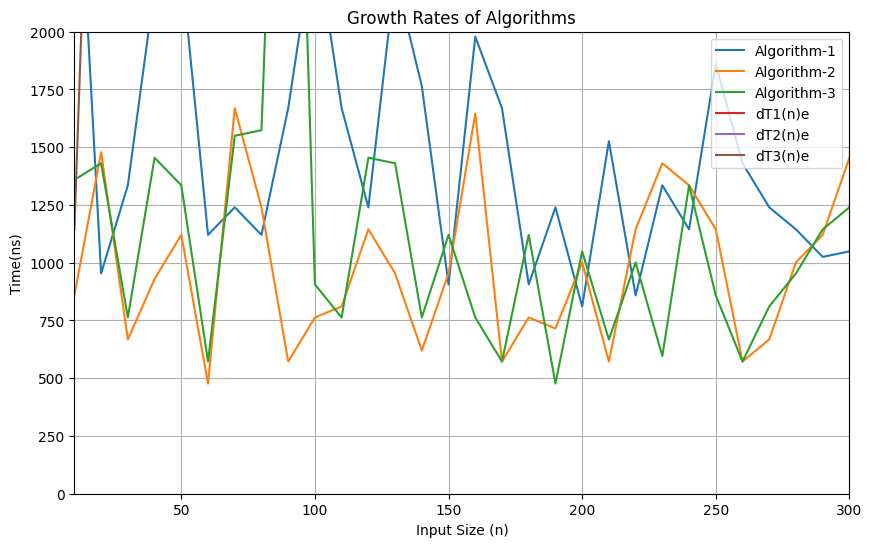

In [27]:
def measure_time_c(algorithm_id, matrices):
    start_time = time.time()
    times = []

    for _ in range(10):  # Repeat 10 times for averaging
        if algorithm_id == 1:
            algorithm_1(*matrices) #CoPilot
        elif algorithm_id == 2:
            algorithm_2(*matrices) #CoPilot
        elif algorithm_id == 3:
            algorithm_3(*matrices) #CoPilot
        elif algorithm_id == 4:
            algorithm_4(*matrices) #CoPilot
        elif algorithm_id == 5:
            algorithm_5(*matrices) #CoPilot
        end_time = time.time()
        total_time = end_time - start_time
        times.append(total_time)

    return times

#Fill Data Frame from here on
    
def experiment_1_c():
    data = {"Size": [], "Algorithm-1": [], "Algorithm-2": [], "Algorithm-3": [], "dT1(n)e": [], "dT2(n)e": [], "dT3(n)e": []}
    for size in range(10, 301, 10):
        A = np.random.rand(size, size)
        B = np.random.rand(size, size)
        C = np.zeros((size, size))
        matrices = [(A, B)] * 10  # Repeat matrices for 10 iterations

        times_algo1 = measure_time_c(algorithm_1, matrices)
        times_algo2 = measure_time_c(algorithm_2, matrices)
        times_algo3 = measure_time_c(algorithm_3, matrices)

        # Handle empty lists (no times recorded)
        avg_time_algo1 = sum(times_algo1) / len(times_algo1) if times_algo1 else 0
        avg_time_algo2 = sum(times_algo2) / len(times_algo2) if times_algo2 else 0
        avg_time_algo3 = sum(times_algo3) / len(times_algo3) if times_algo3 else 0

        data["Size"].append(size)
        data["Algorithm-1"].append(avg_time_algo1 * 1000000000)
        data["Algorithm-2"].append(avg_time_algo2 * 1000000000)
        data["Algorithm-3"].append(avg_time_algo3 * 1000000000)

        # Calculate and add the theoretical values
        p = size
        q= size
        r = size
        
        dT1 = (19*p*r*q + 19*p*r + 12*p +8)
        dT2 = 6*(p/5) + 6*(r/5) + 6*(q/5) + 4*p * q * r
        dT3 = (4 * (p / 2) + 11 * (p ** 2) +26)
        data["dT1(n)e"].append(dT1)
        data["dT2(n)e"].append(dT2)
        data["dT3(n)e"].append(dT3)

    df = pd.DataFrame(data)
    print(df.to_string()) 
    

    plt.figure(figsize=(10, 6))
    plt.plot(df['Size'], df['Algorithm-1'], label='Algorithm-1')
    plt.plot(df['Size'], df['Algorithm-2'], label='Algorithm-2')
    plt.plot(df['Size'], df['Algorithm-3'], label='Algorithm-3')
    plt.plot(df['Size'], df['dT1(n)e'], label='dT1(n)e')
    plt.plot(df['Size'], df['dT2(n)e'], label='dT2(n)e')
    plt.plot(df['Size'], df['dT3(n)e'], label='dT3(n)e')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time(ns)')
    plt.title('Growth Rates of Algorithms')
    plt.legend()
    plt.grid(True)
    plt.xlim(10, 300)
    plt.ylim(0, 2000)
    plt.show()

experiment_1_c()


<h3>Step 5: Experiment 2</h3>

<h4>Generate Exponentially Growing Square Matrices</h4>

The code below is used to generate square matrices of increasing exponential size as per the project directions. This is shown at the begining of the experiment_2_c() class.  The program would not print if the range was 10 as it should be, it timed out every time. It also would time out if the times were taken more than 1 time for averaging purposes.

<h4>Fill Data Frame</h4>

The code below is used to carry out the process for experiment 4, measuring the time of the algorithms used and plotting them against each other. 

   Size   Algorithm-1   Algorithm-3    Algorithm-4    Algorithm-5     dT1(n)e       dT3(n)e       dT4(n)e       dT5(n)e
0     1      8.106232      1.192093      11.920929       1.192093       1.392      8.924603     77.581395     22.432749
1     2      5.960464      5.960464      27.179718      10.013580       6.240     16.933862    137.706977     71.784795
2     4     29.087067     37.908554     194.072723     419.855118      37.824     48.055556    362.693023    261.341520
3     8    171.184540    190.019608     855.922699     861.883163     265.152    170.711640   1231.604651   1003.865497
4    16   1264.095306   1210.689545    5782.127380    5076.885223    1989.312    657.674603   4645.186047   3942.555556
5    32   9632.110596   9417.772293   41078.090668   37913.084030   15418.560   2598.203704  18175.381395  15634.504094
6    64  72466.850281  72348.117828  310748.815536  303740.024567  121424.064  10345.674603  72047.902326  62276.674854


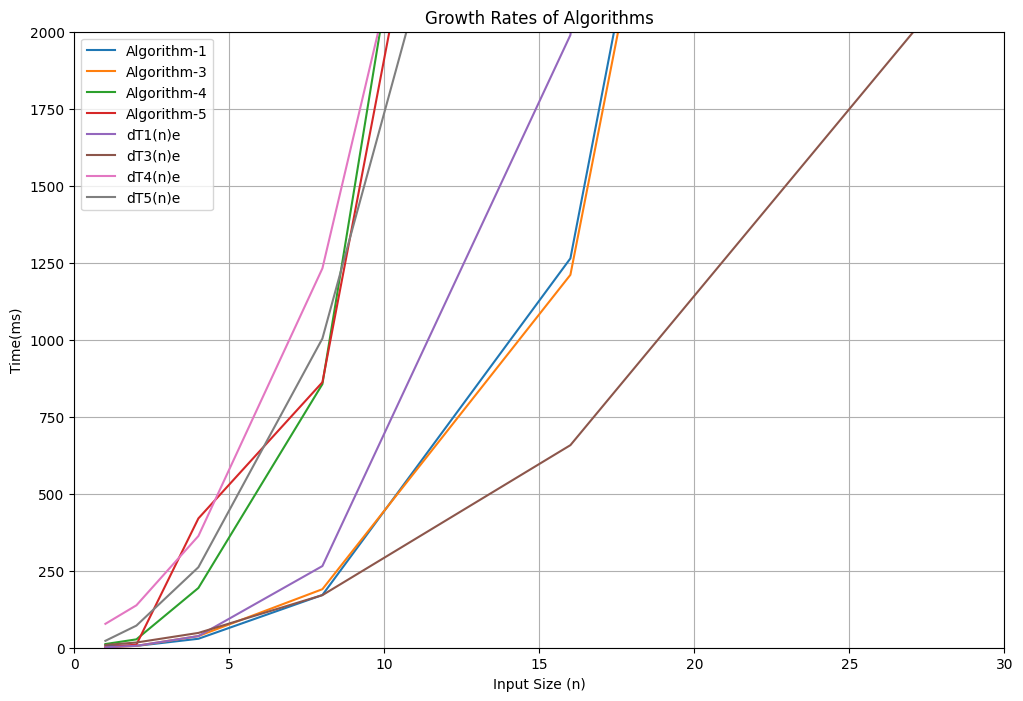

In [28]:
def measure_time_d(algorithm_id, matrices):
    start_time = time.time()
    times = []

    for _ in range(1):  
        for A, B, C in matrices:  # Unpack A, B, and C from matrices
            p, q, r = A.shape[0], A.shape[1], B.shape[1]  # Get dimensions for p, q, r
            if algorithm_id == 1 or algorithm_id == 3:
                algorithm_1(A, B, C, p, q, r)  # Pass A, B, C, and dimensions
            elif algorithm_id == 4 or algorithm_id == 5:
                algorithm_4(A, B, C)  # Pass A, B, C directly
        end_time = time.time()
        total_time = end_time - start_time
        times.append(total_time)
        #print(f"Finished iteration {_ + 1} for algorithm {algorithm_id}")

    #print(f"Times for algorithm {algorithm_id}: {times}")
    return times

def experiment_2_c():
    data = {"Size": [], "Algorithm-1": [], "Algorithm-3": [], "Algorithm-4": [], "Algorithm-5": [], "dT1(n)e": [], "dT3(n)e": [], "dT4(n)e": [], "dT5(n)e": []}
    sizes = [2**i for i in range(7)]  # Generate sizes 2^0, 2^1, ..., 2^9
    matrices = []
    for size in sizes:
        A = np.random.rand(size, size)
        B = np.random.rand(size, size)
        C = np.zeros((size, size))  # Create a zero matrix C
        matrices.append((A, B, C))  # Repeat matrices for 10 iterations
        #print(f"Generated matrices of size {size}x{size}")

        times_algo1 = measure_time_d(1, matrices)
        times_algo3 = measure_time_d(3, matrices)
        times_algo4 = measure_time_d(4, matrices)
        times_algo5 = measure_time_d(5, matrices)

        # Handle empty lists (no times recorded)
        avg_time_algo1 = sum(times_algo1) / len(times_algo1) if times_algo1 else 0
        avg_time_algo3 = sum(times_algo3) / len(times_algo3) if times_algo3 else 0
        avg_time_algo4 = sum(times_algo4) / len(times_algo4) if times_algo4 else 0
        avg_time_algo5 = sum(times_algo5) / len(times_algo5) if times_algo5 else 0

        data["Size"].append(size)
        data["Algorithm-1"].append(avg_time_algo1 * 1000000)
        data["Algorithm-3"].append(avg_time_algo3 * 1000000)
        data["Algorithm-4"].append(avg_time_algo4 * 1000000)
        data["Algorithm-5"].append(avg_time_algo5 * 1000000)

        # Calculate and add the theoretical values
        p = size
        q = size
        r = size

        dT1 = (19*p*r*q + 19*p*r + 12*p +8) * 36/1500 #scaling all of these to be related to the Algorithms
        dT3 = (4 * (p / 2) + 11 * (p ** 2) +26) * 173/756
        dT4 = ((8 * (p / 2) + 9 * (p ** 2) + 27)) * 1251/645
        dT5 = (7 * (p / 2) + 54 * ((p ** 2) / 4) + 3) * 959/855
        data["dT1(n)e"].append(dT1)
        data["dT3(n)e"].append(dT3)
        data["dT4(n)e"].append(dT4)
        data["dT5(n)e"].append(dT5)

    # Create DataFrame after adjusting lengths
    data_df = pd.DataFrame(data)
    data_df
    print(data_df.to_string())

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.plot(data_df['Size'], data_df['Algorithm-1'], label='Algorithm-1')
    plt.plot(data_df['Size'], data_df['Algorithm-3'], label='Algorithm-3')
    plt.plot(data_df['Size'], data_df['Algorithm-4'], label='Algorithm-4')
    plt.plot(data_df['Size'], data_df['Algorithm-5'], label='Algorithm-5')
    plt.plot(data_df['Size'], data_df['dT1(n)e'], label='dT1(n)e')
    plt.plot(data_df['Size'], data_df['dT3(n)e'], label='dT3(n)e')
    plt.plot(data_df['Size'], data_df['dT4(n)e'], label='dT4(n)e')
    plt.plot(data_df['Size'], data_df['dT5(n)e'], label='dT5(n)e')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time(ms)')
    plt.title('Growth Rates of Algorithms')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 30)
    plt.ylim(0, 2000)
    plt.show()

# Run the experiment
experiment_2_c()

<h3>Step 6: Matrix Chain Multiplication</h3>

<h4>Generate Matrix Chains</h4>

The code below is used to generate matrix chains as explained in the directions.

In [11]:
def generate_matrix_chains():
    matrix_chains = []
    for j in range(2, 21):
        dimensions = []
        for i in range(10):
            p = np.random.randint(10, j * 10)
            matrix = np.random.rand(p, p + 1)
            dimensions.append((p, p + 1, matrix))  # Store dimensions and matrix
        matrix_chains.append(dimensions)
    return matrix_chains

matrix_chains = generate_matrix_chains()
print(matrix_chains)


[[(17, 18, array([[6.57563945e-02, 4.09053901e-01, 5.87381874e-01, 8.73062272e-02,
        2.99952851e-01, 7.56812720e-01, 7.66466879e-01, 6.71835694e-01,
        9.11616884e-01, 3.65789315e-01, 8.57304135e-01, 6.07020585e-01,
        2.49038098e-02, 7.31667042e-01, 4.60198215e-01, 1.73602555e-01,
        9.91593708e-01, 6.27783126e-01],
       [4.09613798e-01, 9.17627359e-01, 2.40353418e-01, 3.19747282e-01,
        6.76123936e-01, 2.59556480e-01, 2.16377992e-01, 6.80480194e-01,
        8.20689987e-01, 2.23095908e-01, 5.02840928e-01, 5.48353941e-01,
        5.25035870e-01, 9.01592847e-01, 3.37039104e-01, 6.04041372e-01,
        3.40523331e-01, 4.94673841e-01],
       [9.18837399e-01, 6.51475622e-01, 7.10414416e-02, 6.90363530e-01,
        8.21170985e-01, 4.40316220e-01, 7.30635045e-02, 3.70352905e-01,
        4.78289193e-01, 3.53992800e-01, 7.92343731e-01, 5.39696084e-01,
        9.54707889e-01, 8.87678029e-01, 5.74330899e-02, 2.69200365e-01,
        5.60922782e-01, 8.30813114e-01],
  

<h4>Matrix-Chain-Order</h4>

The following code is my implementation of the MATRIX-CHAIN-ORDER algorithm provided in the project details.

In [26]:
def matrix_chain_order(p, n):
        m = [[0 for x in range(n)] for x in range(n)]
        s = [[0 for x in range(2, n)] for x in range(n - 1)]

        for i in range(1, n):
            m[i][i] = 0

        for l in range(2, n):
            for i in range(1, n - l + 1):
                j = i + l - 1
                m[i][j] = float('inf')
                for k in range(i, j):
                    q = m[i][k] + m[k + 1][j] + p[i - 1] * p[k] * p[j]
                    if q < m[i][j]:
                        m[i][j] = q
                        s[i][j - 1] = k
        return m, s

<h4>Chain-Matrix-Multiply</h4>

This is the chain matrix multiply function as asked for in the project details.

In [27]:
def chain_matrix_multiply(p, s, i, j):
    if i == j:
        print(f"Base case: i={i}, j={j}")
        return p[i - 1], p[i], 0
    else:
        print(f"Recursive call: i={i}, j={j}") 
        A, B, count1 = chain_matrix_multiply(p, s, i, s[i][j])
        C, D, count2 = chain_matrix_multiply(p, s, s[i][j] + 1, j)
        count3 = A * B * D
        return A, D, count1 + count2 + count3

<h4>Time Matrix Chain Multiplication for Algorithms</h4>

In [30]:
def measure_execution_time(algorithm, *args):
    start_time = time.time()
    result = algorithm(*args)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time, result

<h4>Plot and Visualize Results</h4>

In [31]:

def experiment_performance(matrix_chains):
    results = []
    for idx, chain in enumerate(matrix_chains, start=2):
        upper_bound = idx * 10
        p_values = [p for p, _, _ in chain]

        # Measure execution time for sequential multiplication
        _, result_seq = measure_execution_time(chain_matrix_multiply, p_values, None, 0, len(p_values) - 1)

        # Compute optimal order using MATRIX-CHAIN-ORDER
        _, s = matrix_chain_order(p_values, len(p_values))
        _, result_opt = measure_execution_time(chain_matrix_multiply, p_values, s, 0, len(p_values) - 1)

        results.append([idx, upper_bound, result_seq, result_opt])

    df = pd.DataFrame(results, columns=['Matrix Chain ID', 'Upper Bound on Matrix Size', 'Sequential Time', 'Optimal Time'])
    print(df)

matrix_chains = generate_matrix_chains()
experiment_performance(matrix_chains)

NameError: name 'chain_matrix_multiply' is not defined